In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import pickle

In [7]:
df_train = pd.read_csv("Training.csv")
df_test = pd.read_csv("Testing.csv")

In [8]:
df_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [9]:
df_train.shape

(4920, 133)

In [10]:
(df_train.isnull().sum()>0).sum()

0

<Axes: >

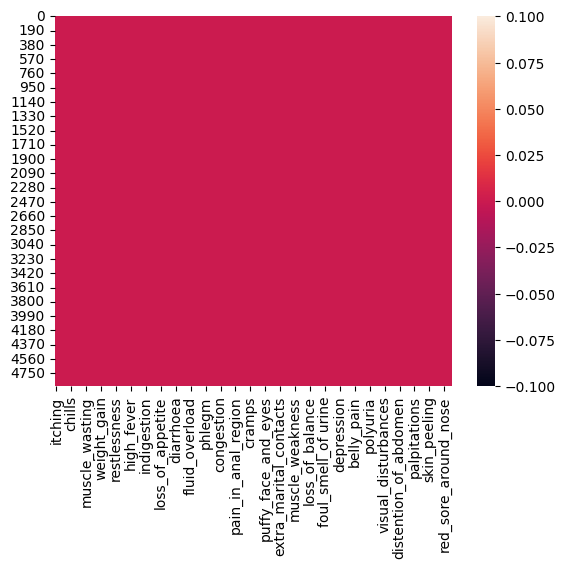

In [11]:
sns.heatmap(df_train.isnull())

In [12]:
df_test.shape

(41, 133)

In [13]:

df_new =df_train.drop_duplicates()

In [14]:
df_new.shape

(304, 133)

In [15]:


def find_best_model(X_train,X_test,y_train,y_test, classifiers):
    best_model = []


    for name, classifier, param_grid in classifiers:
        # Perform grid search with cross-validation
        grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Get the best model
        model = grid_search.best_estimator_

        # Evaluate the model on the test set
        y_pred = model.predict(X_test)

        best_model.append(model)

        # Update the best model if necessary
        # if score > best_score:
        #     best_model = model
        #     best_score = score

    print("Best model")
    return best_model




In [17]:
 


Xtrainall = pd.read_csv("Training.csv")
disease = Xtrainall.iloc[:,-1]
disease = np.unique(disease)

Xtrainall = Xtrainall.sample(random_state=42,frac=1,axis=0)
Xtestall = pd.read_csv("Testing.csv")
Xtestall = Xtestall.sample(random_state=42,frac=1,axis=0)

x_train = Xtrainall.iloc[:,:-1]

encoder = LabelEncoder()
encoded_dis = encoder.fit_transform(disease)
y_train = encoder.transform(Xtrainall.iloc[:,-1])

x_test = Xtestall.iloc[:,:-1]
y_test = encoder.transform(Xtestall.iloc[:,-1])



In [18]:
print(x_train.shape,y_train.shape,x_train.shape,y_test.shape,encoded_dis.shape)

(4920, 132) (4920,) (4920, 132) (41,) (41,)


In [19]:


# Define classifiers and their hyperparameter grids
classifiers = [
    ('Random Forest', RandomForestClassifier(), {'n_estimators': [10, 50, 100]}),
    ('SVM', SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    ('KNN', KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]})
]

best_model = find_best_model(x_train,x_test,y_train,y_test, classifiers)

Best model


In [21]:
with open("modelllist.pkl","wb") as f:
  pickle.dump(best_model,f)
with open("encoder.pkl","wb") as f:
  pickle.dump(encoder,f)

In [22]:
with open('modelllist.pkl', 'rb') as f:
    modelll = pickle.load(f)

In [23]:
print(modelll)

[RandomForestClassifier(n_estimators=10), SVC(C=0.1, kernel='linear'), KNeighborsClassifier(n_neighbors=3)]
